# SoC final Project: Stock Market Prediction using LSTM

Starting of I imported all the libraries which were required.

In [28]:
import yfinance as yf
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns


Fetching the input data from the user regarding the ticker, the starting and end date and the timeframe.

Also downloading the data based on this user input.

In [29]:
ticker = input("Enter the ticker symbol: ")
start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD): ")
timeframe = input("Enter the timeframe (e.g., 1d, 1wk, 1mo): ")
data = yf.download(ticker, start=start_date, end=end_date, interval=timeframe)

C:\Users\Dell\AppData\Local\Temp\ipykernel_6668\710017323.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval=timeframe)
[*********************100%***********************]  1 of 1 completed


In [30]:
data

Price,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
Date,,,,,
2019-12-30,188.882278,193.379463,181.469316,183.001317,130830948
2020-01-06,194.071350,196.690591,178.108763,188.783431,186534422
2020-01-13,195.010330,199.359262,189.178791,192.489920,155211693
2020-01-20,184.335663,199.112165,181.666999,195.702205,137611396
2020-01-27,163.678207,190.315448,161.800248,183.544937,319039268
...,...,...,...,...,...
2024-12-02,809.837158,811.869671,774.342348,780.588632,62578558
2024-12-09,783.563049,813.356875,768.393487,809.837149,61154299


Data visualisation using matplotlib and the seaborn libraries.

In [31]:
def plot_data(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Close Price')
    plt.title(f'{ticker} Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()


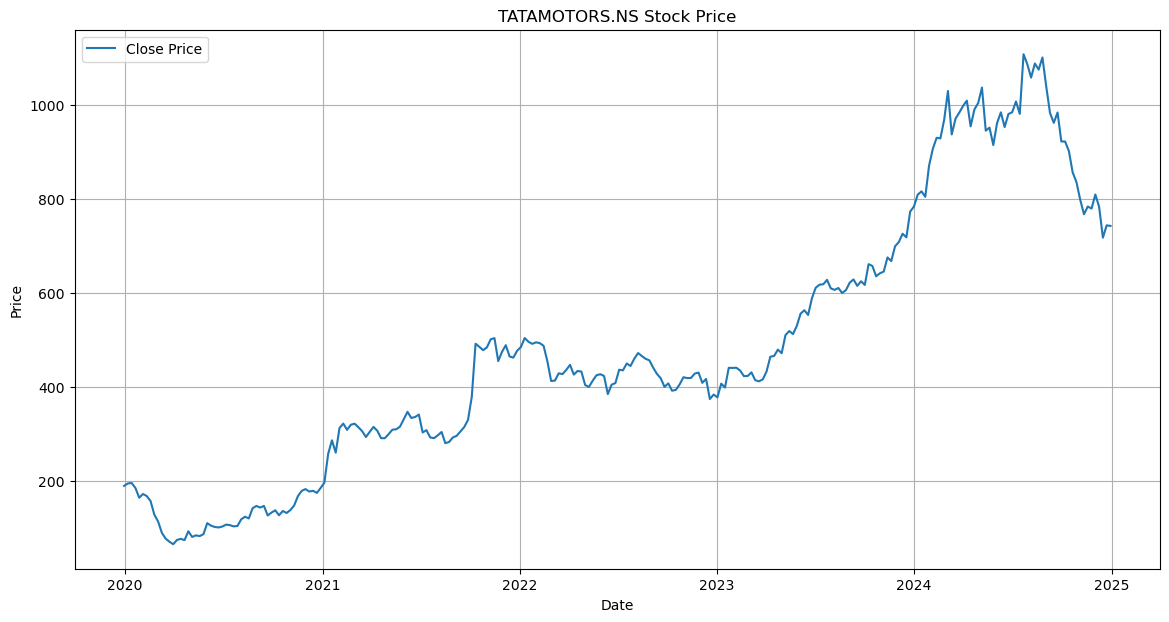

In [32]:
plot_data(data)
# Data visualisation using matplotlib and the seaborn libraries.

Also used various technical indicators as well while visualising the data, as it would be better to analyse it.

Indicators are SMA,EMA along with MACD, RSI and Bollingers Band.

In [35]:
def MACD(data, short_window=12, long_window=26, signal_window=9):
    exp1 = data['Close'].ewm(span=short_window, adjust=False).mean()
    exp2 = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

def RSI(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def SMA(data, window=20):
    return data['Close'].rolling(window=window).mean()

def EMA(data, window=20):
    return data['Close'].ewm(span=window, adjust=False).mean()


def Bollinger_Bands(data, window=20, num_std_dev=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)
    return upper_band, lower_band

In [36]:
def plot_technical_indicators(data):
    macd, signal = MACD(data)
    rsi = RSI(data)
    upper_band, lower_band = Bollinger_Bands(data)
    sma = SMA(data)
    ema = EMA(data)

    plt.figure(figsize=(14, 10))

    # Plotting the Close Price with SMA and EMA
    plt.subplot(4, 1, 1)
    plt.plot(data['Close'], label='Close Price')
    plt.plot(sma, label='SMA', linestyle='--')
    plt.plot(ema, label='EMA', linestyle='--')
    plt.title(f'{ticker} Price with SMA and EMA')
    plt.legend()

    # Plotting Bollinger Bands
    plt.subplot(4, 1, 2)
    plt.plot(data['Close'], label='Close Price')
    plt.plot(upper_band, label='Upper Band', linestyle='--')
    plt.plot(lower_band, label='Lower Band', linestyle='--')
    plt.title(f'{ticker} Bollinger Bands')
    plt.legend()

    # Plotting MACD and Signal Line 
    plt.subplot(4, 1, 3)
    plt.plot(macd, label='MACD', color='blue')
    plt.plot(signal, label='Signal Line', color='orange')
    plt.title('MACD')
    plt.legend()

    # Plotting RSI
    plt.subplot(4, 1, 4)
    plt.plot(rsi, label='RSI', color='purple')
    plt.axhline(70, linestyle='--', alpha=0.5, color='red')
    plt.axhline(30, linestyle='--', alpha=0.5, color='green')
    plt.title('RSI')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

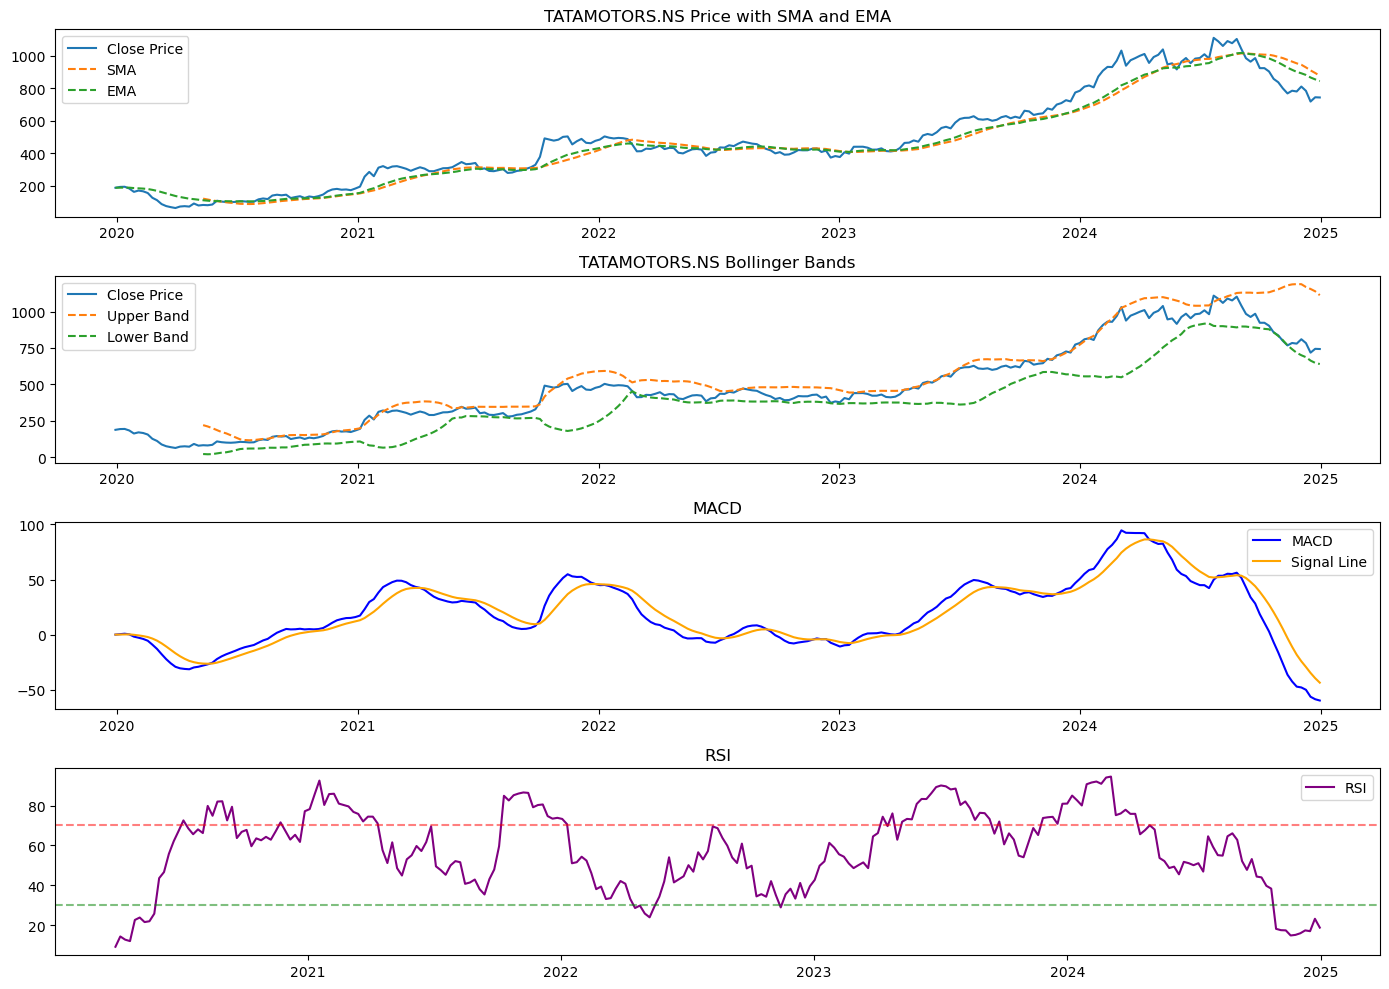

In [37]:
plot_technical_indicators(data)
# Also used various technical indicators as well while visualising the data, as it would be better to analyse it.

Transformed and normalised the data to be used.

Also split the data into testing and training dataset using scikit learn library.
As per the given instruction, I have given 60 days of data as a input data.

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Transformed and normalised the data to be used.
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[['Close']])
    return scaled_data, scaler

# Preprocessing the data using MinMaxScaler and creating the dataset for training and testing.
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)


In [39]:
scaled_data, scaler = preprocess_data(data)
time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Preprocessing the data using MinMaxScaler and creating the dataset for training and testing.

This shows the dimensions of the data which we have scaled to the required parameters.

In [40]:
print(X_test.shape, X_train.shape, y_test.shape, y_train.shape)

(41, 60, 1) (160, 60, 1) (41,) (160,)


Let us now build the LSTM model using tensorflow library.

Here I am building a 2 layer LSTM model for the stock market closing value prediction of following stock.

In [42]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [43]:
model = build_lstm_model((X_train.shape[1], 1))

c:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Now fitting the model with training data and iterating on 50 epoch.

In [44]:
#training the model
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - loss: 0.2503 - val_loss: 0.0514
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0358 - val_loss: 0.0365
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0387 - val_loss: 0.0139
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0163 - val_loss: 0.0242
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0231 - val_loss: 0.0128
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0116 - val_loss: 0.0089
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0124 - val_loss: 0.0078
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0109 - val_loss: 0.0077
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0083 - val_loss: 0.0079
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0101 - val_loss: 0.0053
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0097 - val_loss: 0.0047
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0071 - val_loss: 0.0059


We can understand that model is preety well trained as loss remains is 0.0025

Now implementing this particular model on our testing data.

In [48]:
# Implementing this particular model on our testing data.
predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Now calculating the error through RMSE and R2.

through the in build metric library of sklearn.

In [49]:
R2 = sk.metrics.r2_score(y_test, predictions)
RMSE = np.sqrt(sk.metrics.mean_squared_error(y_test, predictions))
print(f'R2 Score: {R2}')
print(f'RMSE: {RMSE}')

R2 Score: 0.9543353175931343
RMSE: 0.05000812092918255


Now let us visualise this data of the predicted value and actual value of the dataset pf last 15 days or last 15 datapoints.

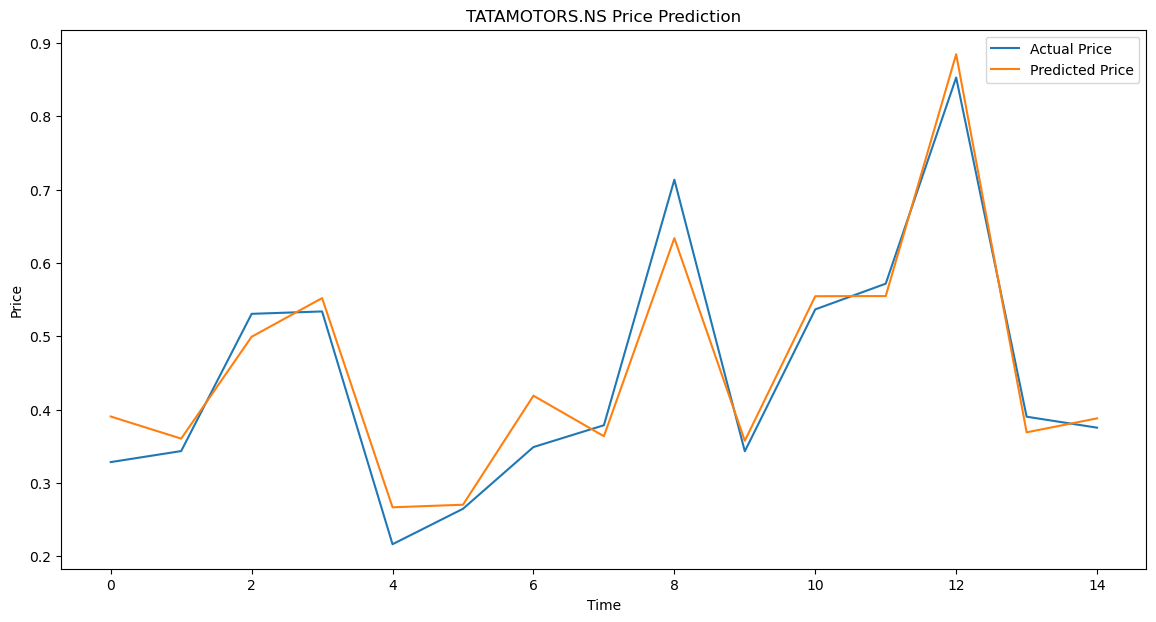

In [54]:
# Plot the data 
plt.figure(figsize=(14, 7))
plt.plot(y_test[-15:], label='Actual Price')
plt.plot(predictions[-15:], label='Predicted Price')
plt.title(f'{ticker} Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Let us also the see the actual value and predicted values to get numerical feel of the model.

In [55]:
# atual values vs predicted values
for i in range(15):
    print(f"Actual: {y_test[i]}, Predicted: {predictions[i][0]}")



Actual: 0.2963126412458263, Predicted: 0.35761013627052307
Actual: 0.2701882942569622, Predicted: 0.2606741189956665
Actual: 0.23914194343677514, Predicted: 0.24674458801746368
Actual: 0.924990738930814, Predicted: 0.7866383194923401
Actual: 0.5190859417137801, Predicted: 0.5347016453742981
Actual: 0.4265557650069834, Predicted: 0.3870087265968323
Actual: 0.3256078824656452, Predicted: 0.3578304648399353
Actual: 0.8596660918235429, Predicted: 0.8782687783241272
Actual: 0.8816466994201141, Predicted: 0.8502804040908813
Actual: 0.40256113880165073, Predicted: 0.43192464113235474
Actual: 0.34699954582731823, Predicted: 0.3614792227745056
Actual: 0.9934009721992866, Predicted: 0.9109305143356323
Actual: 0.8872011636616906, Predicted: 0.8889402747154236
Actual: 0.37837716316708503, Predicted: 0.3820055425167084
Actual: 0.8810295237376717, Predicted: 0.9241207838058472


This shows the efficeny of the model and accuracy with which it predicts the value of a particular stock.